In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
hv = pd.read_csv("weight-height.csv")

In [118]:
hv.head()
hv.shape

(10000, 3)

In [9]:
hv.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<AxesSubplot:ylabel='Frequency'>

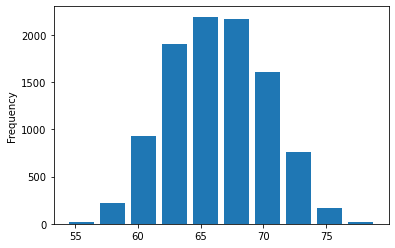

In [50]:
hv["Height"].plot(kind = "hist", rwidth = 0.8)

### Practice 1: Use Percentile by using Quantile function

In [24]:
max_q = hv["Height"].quantile(0.95)

max_q

72.61710606642383

In [26]:
min_q =  hv["Height"].quantile(0.05)

min_q

60.246220826105436

In [65]:
new_hv=hv[(hv["Height"] > min_q) & (hv["Height"] < max_q)]#return all those values which are less than 72 and bigger than 60

new_hv.head()

,Gender,Height,Weight
1,Male,68.781904,162.310473
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [44]:
new_hv.describe()

,Height,Weight
count,9000.000000,9000.000000
mean,66.354968,161.336165
std,3.165556,28.238348
min,60.246257,82.198488
25%,63.803914,137.963170
50%,66.318070,161.212928
75%,68.902716,184.769070
max,72.617038,230.560535


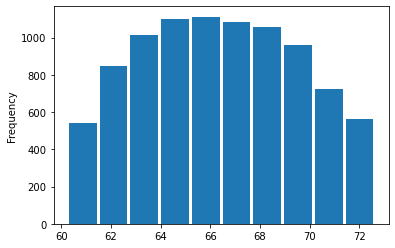

In [57]:
new_hv["Height"].plot(kind = "hist", rwidth = 0.9)

plt.show()

### Within that alternate way

In [60]:
max_q1, min_q1 = hv["Height"].quantile([0.95, 0.05])

In [61]:
max_q1

72.61710606642383

In [62]:
min_q1

60.246220826105436

In [63]:
## will be the same

### Practice 2: Using Z- Score and 3 STD

In [64]:
hv.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


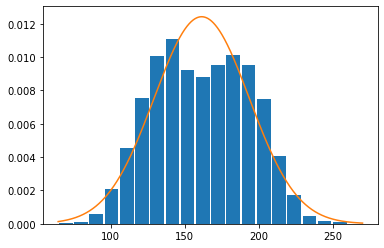

In [79]:
from scipy.stats import norm  
plt.hist(hv["Weight"], bins = 20, rwidth = 0.9, density = True)

range = np.arange(hv["Weight"].min(), hv["Weight"].max(),0.1)
plt.plot(range, norm.pdf(range,hv["Weight"].mean(),hv["Weight"].std()))


plt.show()

### Let's remove outliers by using 3 STD first
3 STD, which covers 99% data from the mean equally half both of the sides.

In [83]:
hv["Weight"].mean()

161.44035683283076

In [84]:
hv["Weight"].std()

32.108439006519546

In [110]:
upper_limit = hv["Weight"].mean() + (3 * hv["Weight"].std())

upper_limit

257.7656738523894

In [111]:
lower_limit = hv["Weight"].mean() - (3 * hv["Weight"].std())

lower_limit

65.11503981327212

In [112]:
new_weight_df = hv[ (hv["Weight"] > lower_limit) & (hv["Weight"] < upper_limit) ]

new_weight_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


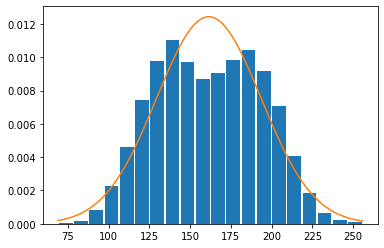

In [113]:
from scipy.stats import norm  
plt.hist(new_weight_df["Weight"], bins = 20, rwidth = 0.9, density = True)

range = np.arange(new_weight_df["Weight"].min(), new_weight_df["Weight"].max(),0.1)
plt.plot(range, norm.pdf(range,new_weight_df["Weight"].mean(),new_weight_df["Weight"].std()))


plt.show()

C:\Users\rupen\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

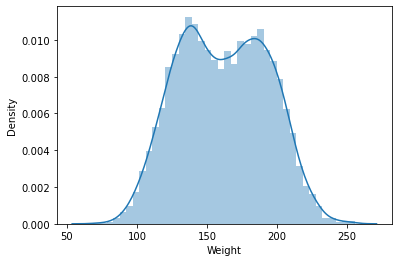

In [114]:
sns.distplot(new_weight_df["Weight"])

In [115]:
new_weight_df["Weight"].median()

161.212927699483

In [116]:
new_weight_df["Weight"].mean()

161.43917568544606

### Z- score

z = x-u/std

In [127]:
hv_z = hv.copy()

In [128]:
hv_z["Z Score"] = (hv["Weight"] - hv["Weight"].mean()) / hv["Weight"].std()

hv_z

,Gender,Height,Weight,Z Score
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.768113
9996,Female,67.067155,170.867906,0.293616
9997,Female,63.867992,128.475319,-1.026678
9998,Female,69.034243,163.852461,0.075124


In [131]:
hv_Zvalues = hv_z [ (hv_z["Z Score"] > -3) & hv_z["Z Score"] < 3 ]

hv_Zvalues

,Gender,Height,Weight,Z Score
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.768113
9996,Female,67.067155,170.867906,0.293616
9997,Female,63.867992,128.475319,-1.026678
9998,Female,69.034243,163.852461,0.075124


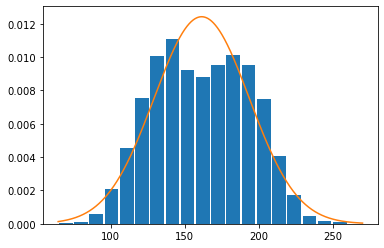

In [132]:
from scipy.stats import norm  
plt.hist(hv_Zvalues["Weight"], bins = 20, rwidth = 0.9, density = True)

range = np.arange(hv_Zvalues["Weight"].min(), hv_Zvalues["Weight"].max(),0.1)
plt.plot(range, norm.pdf(range,hv_Zvalues["Weight"].mean(),hv_Zvalues["Weight"].std()))


plt.show()

In [133]:
hv_Zvalues["Weight"].mean()

161.44035683283076